In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data = pd.read_csv("C:\Data_Science\Jigsaw Academy\ML\session_files\kc_housingdata.csv")

In [7]:
data.head(3)

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   

   sqft_lot15  
0        5650  
1        7639  
2        8062  

[3 rows x 21 columns]

In [8]:
data.shape

(21613, 21)

In [9]:
data_num = data[['price', 'bedrooms' , 'bathrooms', 'sqft_living']]

In [10]:
data_num.head(3)

price  bedrooms  bathrooms  sqft_living
0  221900.0         3       1.00         1180
1  538000.0         3       2.25         2570
2  180000.0         2       1.00          770

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

In [13]:
data_scaled = sc.fit_transform(data_num)

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=3)

In [19]:
kmeans.fit(data_scaled)
## fitting onto the scaled dataset

KMeans(n_clusters=3)

In [20]:
kmeans.labels_

array([1, 0, 1, ..., 1, 0, 1])

In [21]:
kmeans.cluster_centers_
# centroids

array([[-0.03443705,  0.35646516,  0.37043027,  0.22680412],
       [-0.46419653, -0.72567202, -0.86365141, -0.79104016],
       [ 1.89013026,  1.08633555,  1.53795342,  1.92088728]])

In [23]:
## for the unsupervised data we don't need train and test data

In [26]:
## for finding the optimal no of 'k', we go for k-elbow method and Silhouette score (this score should be closer to 1)
## wcss = within clusters sum of squares

In [27]:
wcss = [] # for each value of k from 1 to 29 it calculates wcss
for i in range (1,30):
    kmeans1 = KMeans(n_clusters=i)
    kmeans1.fit(data_scaled)
    wcss.append(kmeans1.inertia_) # within clusters sum of squares
wcss

[86451.99999999999,
 52447.88744809839,
 39577.70477753479,
 33321.519493769054,
 28928.03440817799,
 26256.145003170564,
 24145.877479361716,
 22135.228708872062,
 20839.08914085238,
 19608.402952367604,
 18561.40710782319,
 17609.593385954184,
 16730.41503070904,
 15880.021531420423,
 15300.903218723824,
 14640.299193938,
 13966.620536210587,
 13309.50388778215,
 12893.545356431345,
 12540.959282587732,
 12223.128734452555,
 11839.828498989425,
 11546.525480037424,
 11290.087677100086,
 11040.024543818196,
 10692.681312879651,
 10499.694455275283,
 10242.397657351108,
 10070.164657809804]

Text(0, 0.5, 'wcss')

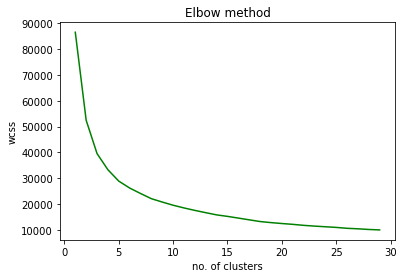

In [29]:
plt.plot(range(1,30),wcss, color = 'green')
plt.title('Elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('wcss')

In [30]:
from sklearn.metrics import silhouette_score

In [34]:
for i in range (2,11):
    labels = KMeans(n_clusters=i).fit(data_scaled).labels_
    print(f"Silhouette score for k = {i} is {silhouette_score(data_scaled,labels)}")
## so we will take k =5 as here the value again increases after decreasing

Silhouette score for k = 2 is 0.37689831579352673
Silhouette score for k = 3 is 0.32472254615657103
Silhouette score for k = 4 is 0.2776186600059204
Silhouette score for k = 5 is 0.2900976830494832
Silhouette score for k = 6 is 0.2816471227600607
Silhouette score for k = 7 is 0.2775031837401423
Silhouette score for k = 8 is 0.2821129247765655
Silhouette score for k = 9 is 0.2732182017497487
Silhouette score for k = 10 is 0.2723452321403163


In [53]:
def get_zprofiles(data,kmeans):
    data['Labels']=kmeans.labels_
    profile= data.groupby('Labels').mean().subtract(data.drop('Labels', axis=1).mean(),axis=1)
    profile = profile.divide(data.drop('Labels',axis=1).std(),axis=1)
    profile['Size']= data['Labels'].value_counts()
    return profile

In [54]:
## import cluster_profiles as cluster_profiles

In [55]:
kmeans = KMeans(n_clusters=5).fit(data_scaled)

In [56]:
##cluster_profiles.get_zprofiles(data_num,kmeans)

In [57]:
get_zprofiles(data_num,kmeans)

C:\Users\shivantripathi\AppData\Local\Temp\ipykernel_6336\993942351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Labels']=kmeans.labels_


price  bedrooms  bathrooms  sqft_living  Size
Labels                                                  
0      -0.173604 -0.496290   0.139743    -0.213049  6943
1       0.955141  0.824807   1.120510     1.369618  3211
2      -0.547014 -0.838962  -1.208865    -0.954870  5527
3      -0.180932  0.895711   0.188410     0.158459  5424
4       4.218688  1.133640   2.148162     2.951656   508

- output is z value in each cluster

* size tells the number of records belonging to each cluster
* Profiling involves generating descriptions of the clusters wrt to the input variables you used for the cluster analysis. Profiling acts as a class descriptor for the clusters and will help you to 'tell a story' so that you can understand this information and use it across your business. 

In [79]:
## Aglomerative clustering (called as Bottom-Up approach)-
## (Dendrogram)

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
data = pd.read_csv("C:\Data_Science\Jigsaw Academy\ML\session_files\pollution_india_2010.csv" , na_values = 'Null')

In [82]:
data.head(3)

City   NO2  PM10  SO2           State
0   Chitoor   9.0  39.0  4.0  Andhra Pradesh
1    Guntur  11.0  81.0  2.0  Andhra Pradesh
2  Hydrabad  24.0  79.0  5.0  Andhra Pradesh

In [83]:
data.isnull().sum()

City     0
NO2      4
PM10     1
SO2      5
State    0
dtype: int64

In [84]:
data.shape

(181, 5)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    181 non-null    object 
 1   NO2     177 non-null    float64
 2   PM10    180 non-null    float64
 3   SO2     176 non-null    float64
 4   State   181 non-null    object 
dtypes: float64(3), object(2)
memory usage: 7.2+ KB


In [89]:
data.drop_duplicates(inplace=True)

In [92]:
data.dropna(inplace=True)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 180
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    175 non-null    object 
 1   NO2     175 non-null    float64
 2   PM10    175 non-null    float64
 3   SO2     175 non-null    float64
 4   State   175 non-null    object 
dtypes: float64(3), object(2)
memory usage: 8.2+ KB


In [94]:
data.isnull().sum()

City     0
NO2      0
PM10     0
SO2      0
State    0
dtype: int64

In [95]:
data.shape

(175, 5)

In [98]:
data_pol = data.groupby('State', as_index=False)[['NO2', 'PM10', 'SO2']].agg(np.sum)

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
sc = StandardScaler()

In [101]:
data1 = data_pol.drop("State", axis = 1)

In [102]:
for i in data1.columns:
    data1[i] = sc.fit_transform(data1[i].values.reshape(-1,1))

In [103]:
data1.head(3)

NO2      PM10       SO2
0  0.237137  0.415499 -0.003185
1  0.198682  0.316828  0.181541
2 -0.679365 -0.775232 -0.702503

In [104]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [105]:
data_scaled = np.array(data1)

In [107]:
Z = linkage(data_scaled, method = "single")
## using Single linkage method

In [108]:
fig, ax = plt.subplots(figsize=(10,10))
ax = dendrogram(Z,labels=np.array(data_pol['State']), leaf_rotation=90, leaf_font_size=8)
plt.tight_layout()
plt.show()

In [109]:
from sklearn.cluster import AgglomerativeClustering

In [120]:
cluster = AgglomerativeClustering(n_clusters=5)

In [121]:
labels = cluster.fit_predict(data_scaled)

In [122]:
labels

array([1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 0, 1, 1, 0, 2, 3, 3, 3, 1,
       3, 0, 1, 1, 0, 3, 4], dtype=int64)

In [123]:
from sklearn.metrics import silhouette_score

In [125]:
for i in range (2,11):
    labels = AgglomerativeClustering(n_clusters=i).fit(data_scaled).labels_
    print(f"Silhouette score for k = {i} is {silhouette_score(data_scaled, labels)}")

Silhouette score for k = 2 is 0.6085971658049444
Silhouette score for k = 3 is 0.5645048914206221
Silhouette score for k = 4 is 0.49559620407189864
Silhouette score for k = 5 is 0.5031125548795552
Silhouette score for k = 6 is 0.4968965906576862
Silhouette score for k = 7 is 0.4778682132185311
Silhouette score for k = 8 is 0.49246216984676605
Silhouette score for k = 9 is 0.4696276476079036
Silhouette score for k = 10 is 0.46138784950208894


In [126]:
## we can go for profiling now